In [1]:
import twitter
from datetime import datetime
import json
import matplotlib.pyplot as plt
%matplotlib inline

CONSUMER_KEY = "IFsgWtE2fw56RITBsl5A279cq"
CONSUMER_SECRET = "kvhA9lyR6H72YN7Dxr3HwQ2Jqe6EQ9KF1oHxUpfTgZ1SokXLbt"
OAUTH_TOKEN = "1139005664125231106-1WyuyTHk3mwNS4joBU30jHhDqC60s3"
OAUTH_TOKEN_SECRET = "NSwAP2E2s6G1v3CNl2a3j4fj7oLYtzkHxUqcOSjKSHrYg"

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

print(twitter_api)

In [149]:
q = "chiefs bets OR chiefs superbowl OR #chiefskingdom OR chiefs gambles OR chiefs odds OR chiefs OR 49ers bets OR 49ers superbowl OR #49ers OR 49ers gambles OR 49ers odds OR 49ers -filter:retweets"

count = 100

until = '2020-02-01'

from urllib.parse import unquote

In [150]:
search_results = twitter_api.search.tweets(q=q, count=count, until=until)

statuses = search_results['statuses']

In [151]:
for _ in range(99):
    print('Length of statuses', len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e:
        break
    
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&")])
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']
    
print(json.dumps(statuses[0], indent=1))

Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 500
Length of statuses 600
Length of statuses 700
Length of statuses 800
Length of statuses 900
Length of statuses 1000
Length of statuses 1100
Length of statuses 1146
Length of statuses 1146
{
 "created_at": "Fri Jan 31 23:59:55 +0000 2020",
 "id": 1223395515947085824,
 "id_str": "1223395515947085824",
 "text": "Chiefs vs 49ers Sunday Super Bowl LIV. Original primary logo of the Chiefs coming from Dallas. Chiefs logos\u2026 https://t.co/7GoWfYGDym",
 "truncated": true,
 "entities": {
  "hashtags": [],
  "symbols": [],
  "user_mentions": [],
  "urls": [
   {
    "url": "https://t.co/7GoWfYGDym",
    "expanded_url": "https://twitter.com/i/web/status/1223395515947085824",
    "display_url": "twitter.com/i/web/status/1\u2026",
    "indices": [
     109,
     132
    ]
   }
  ]
 },
 "metadata": {
  "iso_language_code": "en",
  "result_type": "recent"
 },
 "source": "<a href=\"http

In [152]:
status_texts = [ status['text']
                for status in statuses ]


screen_names = [ user_mention['screen_name']
                 for status in statuses
                     for user_mention in status['entities']['user_mentions']]

hashtags = [ hashtag['text']
             for status in statuses
                 for hashtag in status['entities']['hashtags']]

words = [w
         for t in status_texts
             for w in t.split()]

print(json.dumps(status_texts[:5], indent=1))
print(json.dumps(screen_names[:5], indent=1))
print(json.dumps(hashtags[:5], indent=1))
print(json.dumps(words[:5], indent=1))

[
 "Chiefs vs 49ers Sunday Super Bowl LIV. Original primary logo of the Chiefs coming from Dallas. Chiefs logos\u2026 https://t.co/7GoWfYGDym",
 "Uma pr\u00e9via do Super Bowl 54, entre 49ers e Chiefs. N\u00e3o est\u00e1 no texto, mas aposto na equipe de San Francisco\n\nhttps://t.co/WiiqXCTv1s",
 "49ers. Their tight end does Cero Miedo when he scores or gets a first down! \n\nKansas City Chiefs. Their tight end d\u2026 https://t.co/vuECX6myXQ",
 "@michelleismyna2 49ers....but the Chiefs have the momentum...hope it's a good game!",
 "Why Patrick Mahomes can already join sport\u2019s immortals with a victory in the Super Bowl on Sunday\n\nBy @JackRathborn\u2026 https://t.co/UMUN9qyNze"
]
[
 "michelleismyna2",
 "JackRathborn",
 "deptulahasrage",
 "49ers",
 "Chiefs"
]
[
 "NFL",
 "Superbowl",
 "superbowl54",
 "superbowlsunday",
 "kansascity"
]
[
 "Chiefs",
 "vs",
 "49ers",
 "Sunday",
 "Super"
]


In [153]:
len(screen_names)

1465

In [154]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10])
    print()

[('the', 739), ('49ers', 426), ('Chiefs', 406), ('Super', 305), ('to', 265), ('Bowl', 264), ('a', 217), ('and', 214), ('@49ers', 213), ('@Chiefs', 206)]

[('49ers', 228), ('Chiefs', 223), ('incarceratedbob', 47), ('SuperBowl', 29), ('NFL', 24), ('KayaJones', 21), ('danorlovsky7', 10), ('guzmanjuegue', 10), ('FOXSportsMX', 10), ('LigaBBVAMX', 10)]

[('49ers', 71), ('SuperBowl', 59), ('SuperBowlLIV', 51), ('Chiefs', 48), ('SBLIV', 20), ('superbowl', 14), ('ChiefsKingdom', 13), ('SuperBowLIV', 12), ('NFL', 11), ('SuperBowl2020', 9)]



In [155]:
from prettytable import PrettyTable

for label, data in (('Word', words),
                    ('Screen Name', screen_names),
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count'])
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = '1', 'r'
    
    print(pt)

+---------+-------+
|   Word  | Count |
+---------+-------+
|   the   |   739 |
|  49ers  |   426 |
|  Chiefs |   406 |
|  Super  |   305 |
|    to   |   265 |
|   Bowl  |   264 |
|    a    |   217 |
|   and   |   214 |
|  @49ers |   213 |
| @Chiefs |   206 |
+---------+-------+
+-----------------+-------+
|   Screen Name   | Count |
+-----------------+-------+
|      49ers      |   228 |
|      Chiefs     |   223 |
| incarceratedbob |    47 |
|    SuperBowl    |    29 |
|       NFL       |    24 |
|    KayaJones    |    21 |
|   danorlovsky7  |    10 |
|   guzmanjuegue  |    10 |
|   FOXSportsMX   |    10 |
|    LigaBBVAMX   |    10 |
+-----------------+-------+
+---------------+-------+
|    Hashtag    | Count |
+---------------+-------+
|     49ers     |    71 |
|   SuperBowl   |    59 |
|  SuperBowlLIV |    51 |
|     Chiefs    |    48 |
|     SBLIV     |    20 |
|   superbowl   |    14 |
| ChiefsKingdom |    13 |
|  SuperBowLIV  |    12 |
|      NFL      |    11 |
| SuperBowl2020 

Text(0.5, 0, 'Word Rank')

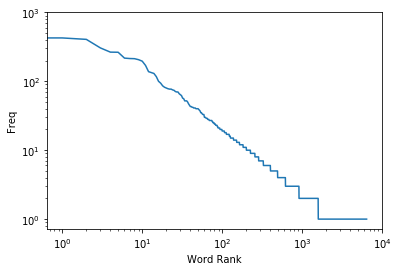

In [156]:
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel('Freq')
plt.xlabel('Word Rank')

In [157]:
status_id = [ status['id'] for status in statuses ]
len(status_id)

1146

In [158]:
date = [ status['created_at'] for status in statuses ]
print(date[:4])

['Fri Jan 31 23:59:55 +0000 2020', 'Fri Jan 31 23:59:44 +0000 2020', 'Fri Jan 31 23:59:13 +0000 2020', 'Fri Jan 31 23:59:13 +0000 2020']


In [159]:
id_str = [ status['id_str'] for status in statuses ]
len(id_str)

1146

In [160]:
location = [ status['geo'] for status in statuses ]
len(location)

1146

In [161]:
retweet_count = [ status['retweet_count'] for status in statuses ]
len(retweet_count)

1146

In [162]:
favorite_count = [ status['favorite_count'] for status in statuses ]
len(favorite_count)

1146

In [163]:
import pandas as pd
from textblob import TextBlob

dictionary = {'status_id':status_id,
              'date':date,
              'location':location,
              'favorite_count':favorite_count,
              'retweet_count':retweet_count,
              'status_texts':status_texts}


df = pd.DataFrame(data=dictionary)
df.head()

status_id                            date location  \
0  1223395515947085824  Fri Jan 31 23:59:55 +0000 2020     None   
1  1223395469478518784  Fri Jan 31 23:59:44 +0000 2020     None   
2  1223395341560471552  Fri Jan 31 23:59:13 +0000 2020     None   
3  1223395339241172993  Fri Jan 31 23:59:13 +0000 2020     None   
4  1223395285134540800  Fri Jan 31 23:59:00 +0000 2020     None   

   favorite_count  retweet_count  \
0               0              0   
1               0              0   
2              20              1   
3               2              0   
4               0              0   

                                        status_texts  
0  Chiefs vs 49ers Sunday Super Bowl LIV. Origina...  
1  Uma prévia do Super Bowl 54, entre 49ers e Chi...  
2  49ers. Their tight end does Cero Miedo when he...  
3  @michelleismyna2 49ers....but the Chiefs have ...  
4  Why Patrick Mahomes can already join sport’s i...

In [164]:
df.status_texts[1]

'Uma prévia do Super Bowl 54, entre 49ers e Chiefs. Não está no texto, mas aposto na equipe de San Francisco\n\nhttps://t.co/WiiqXCTv1s'

In [165]:
import re

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+) | ([^0-9A-Za-z \t]) | (\w+:\/\/\S+)"," ", tweet).split())

In [166]:
df['new_text'] = pd.Series([clean_tweet(tweet) for tweet in df.status_texts])

In [167]:
df.loc[:,['status_texts', 'new_text']].head()

status_texts  \
0  Chiefs vs 49ers Sunday Super Bowl LIV. Origina...   
1  Uma prévia do Super Bowl 54, entre 49ers e Chi...   
2  49ers. Their tight end does Cero Miedo when he...   
3  @michelleismyna2 49ers....but the Chiefs have ...   
4  Why Patrick Mahomes can already join sport’s i...   

                                            new_text  
0  Chiefs vs 49ers Sunday Super Bowl LIV. Origina...  
1  Uma prévia do Super Bowl 54, entre 49ers e Chi...  
2  49ers. Their tight end does Cero Miedo when he...  
3  49ers....but the Chiefs have the momentum...ho...  
4  Why Patrick Mahomes can already join sport’s i...

In [168]:
def analyze_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [169]:
df['sentiment'] = pd.Series([analyze_sentiment(tweet) for tweet in df.status_texts])
df.sentiment.head(15)

0     1
1     1
2    -1
3     1
4     1
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    1
13    1
14    1
Name: sentiment, dtype: int64

In [170]:
df['new_date'] = pd.to_datetime(df.date, format='%m-%d-%y', infer_datetime_format=True)
df.new_date.head()

0   2020-01-31 23:59:55+00:00
1   2020-01-31 23:59:44+00:00
2   2020-01-31 23:59:13+00:00
3   2020-01-31 23:59:13+00:00
4   2020-01-31 23:59:00+00:00
Name: new_date, dtype: datetime64[ns, UTC]

In [171]:
df['days'] = df.new_date.dt.day
df.days.value_counts()

31    1146
Name: days, dtype: int64

In [172]:
df.to_csv(path_or_buf='/Users/ramon/OneDrive/datascience/twi_project/both_12.csv', index=False)